# <span style="color:green"> Numerical Simulation Laboratory (NSL) exercises 12 Results</span>

First we upload all data and prepare them for the future part of the results.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.compat.v1.set_random_seed(seed)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [25]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
#print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

#print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
#print('... and with label', Y_train[20], 'after to_categorical')
#print()
#print('X_train shape:', X_train.shape)
#print('Y_train shape:', Y_train.shape)

### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [20]:
batch_size = 32
epochs = 5
    
def create_DNN(optimizer):
    # instantiate model
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))
    
    return history

In an ideal situetion the following code should run every optimizer method and then an immediate following cell should create an interactive plot (require the ipympl module istalled) from which every method can be selected and removed from the plot to see which is best.

It used to work and then in the last check stop, so we present a different plot for every method, a little crowded.

As can be (hardly but still) seen by model loss and accuracy plot our best methods are SGD and RMSprop, Nadam (Nadam and RMSprop overlap), with Adagrad and Adadelda following.

The other methods maintain a very low accuracy then a hight loss.

In [8]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']
history = dict()
for optimizer in optimizers:
    print(f"Using {optimizer}")
    history[optimizer] = create_DNN(optimizer).history

Using Adadelta
Using Adagrad
Using Adam
Using Ftrl
Using Nadam
Using RMSprop
Using SGD


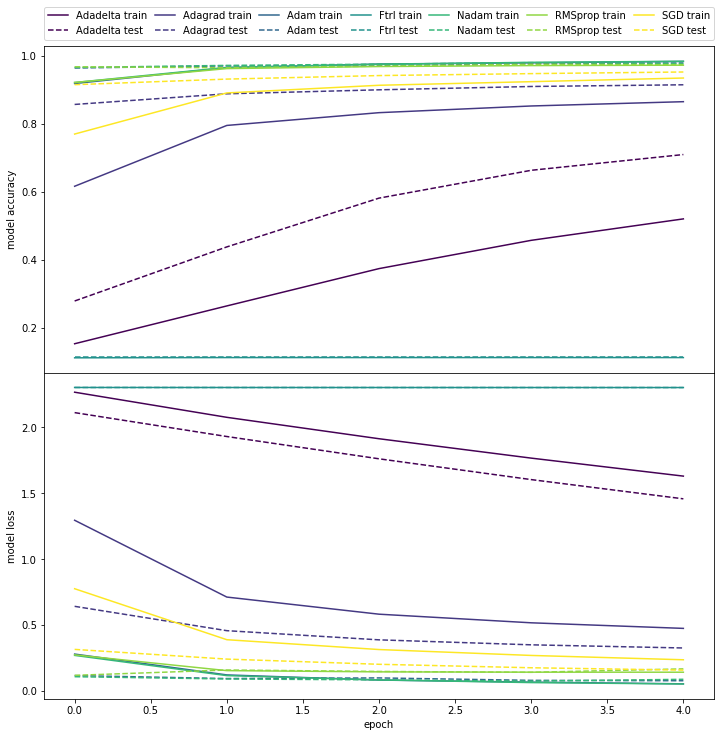

In [13]:
#%matplotlib widget
%matplotlib inline
colors = ['r', 'b', 'y', 'orange', 'brown', 'k', 'cyan']
colors = plt.cm.viridis(np.linspace(0,1,len(optimizers)))
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,12), sharex=True)
fig.subplots_adjust(hspace=0)

for i, optimizer in enumerate(optimizers):       
    ax1.plot(history[optimizer]['accuracy'], label=f'{optimizer} train', linewidth=1.5, color=colors[i]) #alpha=0.5
    ax1.plot(history[optimizer]['val_accuracy'], '--', label=f'{optimizer} test', linewidth=1.5, color=colors[i])
    ax2.plot(history[optimizer]['loss'], label=f'{optimizer} train', linewidth=1.5, color=colors[i])
    ax2.plot(history[optimizer]['val_loss'], '--', label=f'{optimizer} test', linewidth=1.5, color=colors[i])

ax1.set_ylabel('model accuracy')
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
 # ax1.legend(loc='right')
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
            ncol=len(optimizers), mode="expand", borderaxespad=0.)
 # ax1.grid(True)
 # ax2.grid(True)

plt.show()

The following cell should run the cited above interactive graph, but it doesn't work.

In [5]:
%matplotlib widget
# colors = ['r', 'b', 'y', 'orange', 'brown', 'k', 'cyan']
colors = plt.cm.viridis(np.linspace(0,1,len(optimizers)))
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10), sharex=True)
fig.subplots_adjust(hspace=0)

lines_acc = []
lines_loss = []

for i, optimizer in enumerate(optimizers):       
    l_acc, = ax1.plot(history[optimizer]['accuracy'], label=f'{optimizer} train', linewidth=1.5, color=colors[i]) #alpha=0.5
    l_valacc, = ax1.plot(history[optimizer]['val_accuracy'], '--', label=f'{optimizer} test', linewidth=1.5, color=colors[i])
    
    l_loss, = ax2.plot(history[optimizer]['loss'], label=f'{optimizer} train', linewidth=1.5, color=colors[i])
    l_valloss, = ax2.plot(history[optimizer]['val_loss'], '--', label=f'{optimizer} test', linewidth=1.5, color=colors[i])
    
    lines_acc.append(l_acc)
    lines_acc.append(l_valacc)
    lines_loss.append(l_loss)
    lines_loss.append(l_valloss)

ax1.set_ylabel('model accuracy')
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
legend = ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=len(optimizers), mode="expand", borderaxespad=0.)
# ax1.grid(True)
# ax2.grid(True)

lined_acc = {}  # Will map legend lines to original lines.
lined_loss = {}
for legline, origline in zip(legend.get_lines(), lines_acc):
    legline.set_picker(20)  # Enable picking on the legend line.
    lined_acc[legline] = origline
    
for legline, origline in zip(legend.get_lines(), lines_loss):
    lined_loss[legline] = origline    
    

def on_pick(event):
    legline = event.artist
    
    origline_acc = lined_acc[legline]
    visible_acc = not origline_acc.get_visible()
    origline_acc.set_visible(visible_acc)
    legline.set_alpha(1.0 if visible_acc else 0)
    
    origline_loss = lined_loss[legline]
    visible_loss = not origline_loss.get_visible()
    origline_loss.set_visible(visible_loss)
    legline.set_alpha(1.0 if visible_loss else 0)
    
    fig.canvas.draw()
    
fig.canvas.mpl_connect('pick_event', on_pick)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [15]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers.

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. 

Below we have defined the new CNN with the required architecture:

In [16]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), #filters=10,
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=4))
#     model.add(Dropout(rate=0.6))
    
    model.add(Flatten())
    model.add(Dropout(rate=0.4))
    model.add(Dense(32, activation='relu'))
#     model.add(Dropout(rate=0.8))
#     model.add(Dropout(rate=0.5))
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer='Nadam',
                  metrics=['accuracy'])
    
    
    return model

batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

model_CNN.summary()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 360)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 360)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                11552     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 12,142
Trainable params: 12,142
Non-trainable params: 0
_________________________________________________

In [199]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(rate=0.3))
#     model.add(Conv2D(4, kernel_size=(5, 5),
#                          activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(5, kernel_size=(2, 2),
#                          activation='relu'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
#     model.add(Dropout(rate=0.8))
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer='Nadam',
                  metrics=['accuracy'])
    
    
    return model

Train your DCNN and evaluate its performance proceeding exactly as before:

In [200]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1852 - accuracy: 0.9463 - val_loss: 0.0624 - val_accuracy: 0.9811
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0541 - val_accuracy: 0.9817
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0453 - val_accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0476 - val_accuracy: 0.9849
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9860

Test loss: 0.04369356855750084
Test accuracy: 0.9860000014305115


### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

We present our evaluation for our digit and the original ones in the following cells:

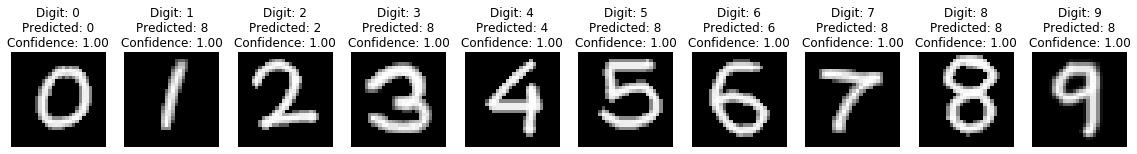

In [24]:
%matplotlib inline

from PIL import Image
import os

plt.figure(figsize=(20, 8))
# plt.subplots_adjust(wspace=0.8)
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)
    digit_filename = f"./my_nist/{i}.png"
    digit_in = tf.keras.preprocessing.image.img_to_array(Image.open(digit_filename).convert('L'))
#     j = tf.keras.preprocessing.image.img_to_array(digit_in)
    digit_in = np.asarray([digit_in])
    predictions = model_CNN.predict(digit_in)
    plt.imshow(digit_in[0,:,:,0], cmap='gray')    
    plt.title(f"Digit: {i}\nPredicted: {np.argmax(predictions)}\nConfidence: {np.max(predictions):.2f}")    
    plt.axis('off') 
plt.show()

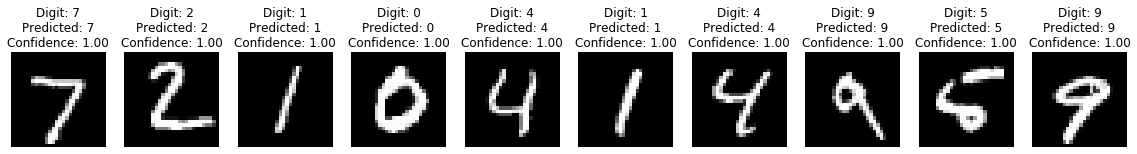

In [22]:
plt.figure(figsize=(20, 8))
# plt.subplots_adjust(wspace=0.8)
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)
    digit_in = X_test[[i]]
    predictions = model_CNN.predict(digit_in)
    plt.imshow(digit_in[0,:,:,0], cmap='gray')
    Image.fromarray(digit_in[0,:,:,0]*255).convert('L').save(f"{np.argmax(Y_test[i])}.png")
    plt.title(f"Digit: {np.argmax(Y_test[i])}\nPredicted: {np.argmax(predictions)}\nConfidence: {np.max(predictions):.2f}")    
    plt.axis('off') 
plt.show()